# 01 Importing libraries and data sets

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path
path = r'C:\Users\zunai\OneDrive\Documents\Data Analytics\Achivement 4\11-22 Instacart Basket Analysis'

In [3]:
#Import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'full_instacart_data.pkl'))

In [4]:
# Dataframe output check 
df.shape

(32404859, 33)

In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,999.0,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 02 Bar chart for order days of the week

<AxesSubplot:>

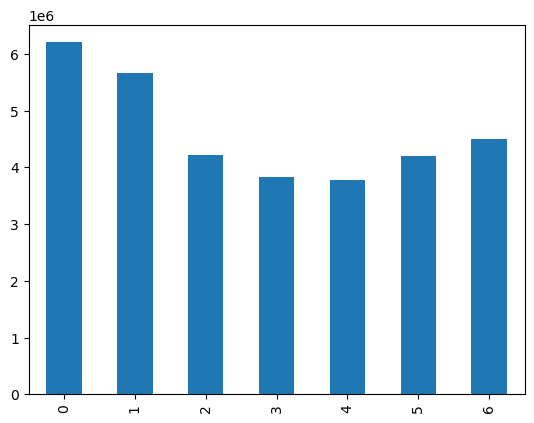

In [6]:
df['order_dow'].value_counts().sort_index().plot.bar()

# 03 Histogram and Scatterplot for prices

<AxesSubplot:ylabel='Frequency'>

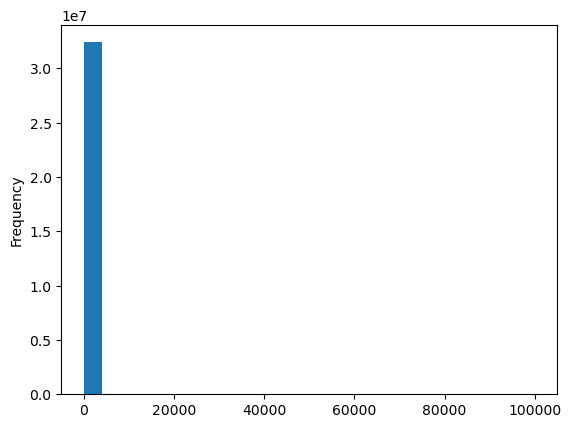

In [8]:
df['prices'].plot.hist(bins = 25)

#### Expected to see 25 bins, but only 1 is visible. Will carry out some exploratory checks to see why this is.

In [9]:
df['prices'].mean()

11.98022563865405

In [10]:
df['prices'].median()

7.4

In [11]:
df['prices'].max()

99999.0

#### Maximum price of 99999 is very strange and most likely an error. Will now identiful possible outliers by assuming the maximum price of a product sold in the supermarket is 100.

In [12]:
#Find products with price greater than 100
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,999.0,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [13]:
#Mark prices > 100 as missing 
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [14]:
#Check new maximum value for 'price'
df['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

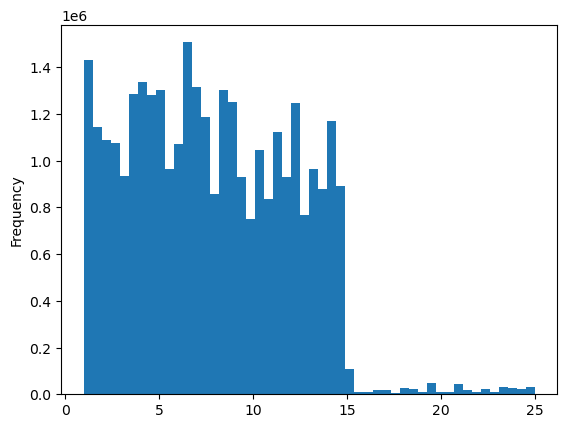

In [16]:
#Create new histogram with updated df
df['prices'].plot.hist(bins = 50)

<AxesSubplot:xlabel='prices', ylabel='prices'>

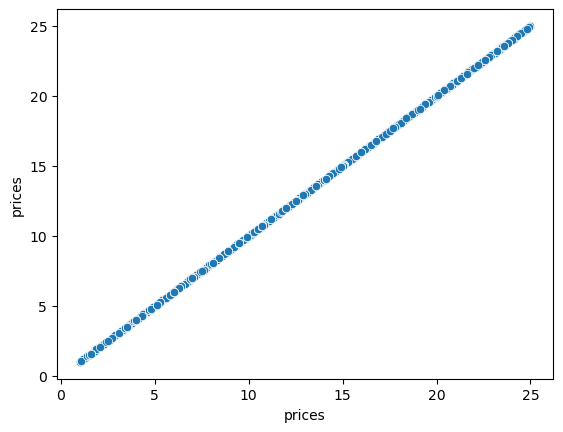

In [17]:
#Creating scatterplot (plotting 'prices' column against itself)
sns.scatterplot(x = 'prices', y = 'prices', data = df)

# 04 Creating line chart using sample subset

### Sampling data

In [18]:
#Set seed for randon number generator to make results reproducible
np.random.seed(4)

In [20]:
#Create new list dev, which stores boolean values for every value based on whether it’s less than or equal to 0.7
dev = np.random.rand(len(df)) <= 0.7

In [22]:
#Code logical test to comparing each number in dev list to 0.7 (more or less than)
big = df[dev] #70% of sample
small = df[~dev] #30% of sample

In [23]:
#accuracy check
len(df)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
#Reduce samples to only columns neccessary for chart
df_2 = small[['prices', 'order_dow']]

In [26]:
df_2.shape

(9721098, 2)

In [27]:
small.shape

(9721098, 33)

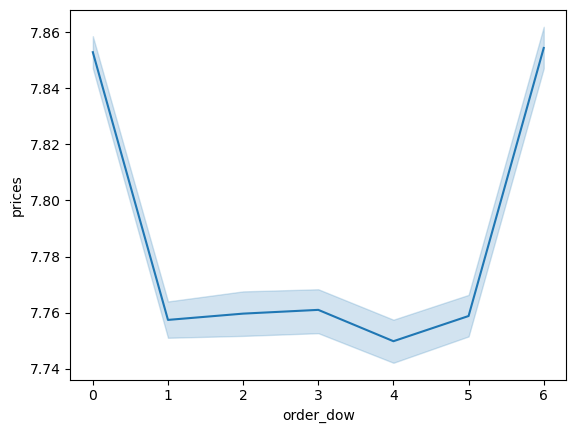

In [28]:
line = sns.lineplot(data = df_2, x = 'order_dow', y = 'prices')

# Q3 Histogram of the “order_hour_of_day”

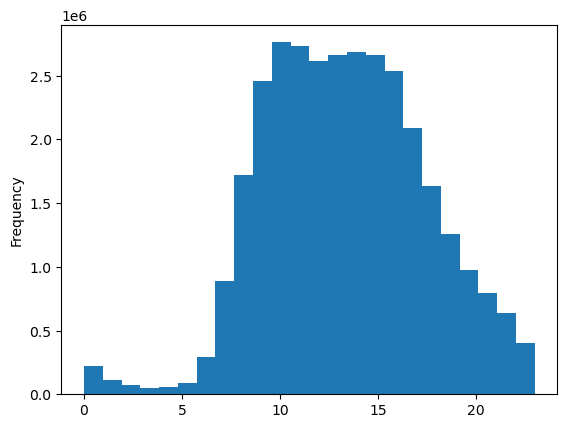

In [30]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram above marks the hours of the day (0-23) and the y axis represents number of orders placed in millions. We can easily see majority of products are purchased in the afternoon (10am - 4pm)

In [31]:
#checking the histogram accuracy
df['order_hour_of_day'].value_counts(dropna=False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

# Q4 Create a bar chart from the “loyalty_flag” column

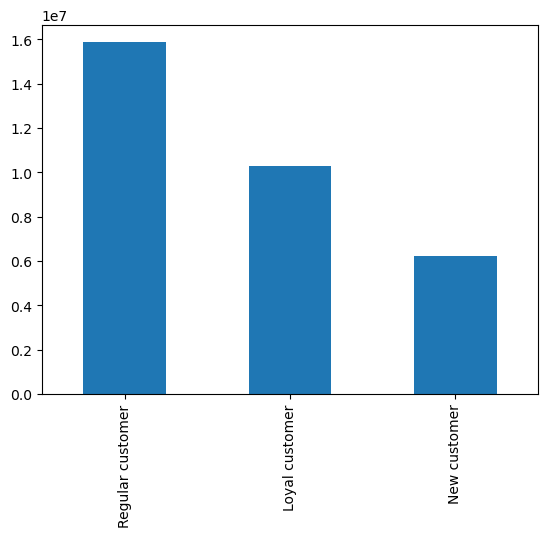

In [32]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()

# Q5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [34]:
#Using earlier splitted data of 30% and selecting the right columns
df_prices_hour = small[['order_hour_of_day', 'prices']]

In [35]:
df_prices_hour

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


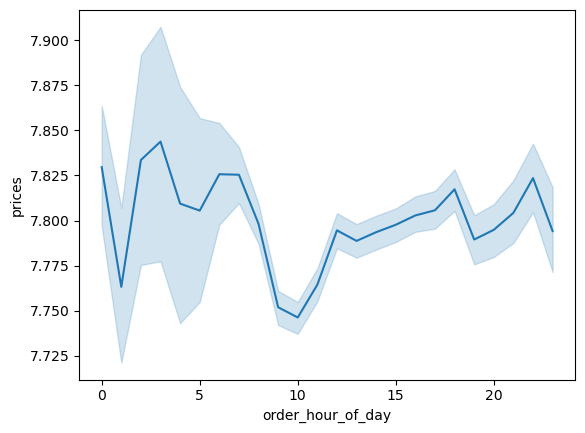

In [36]:
line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

# Q6 Create a line chart exploring the connections between age and number of dependents to see if there’s a connection between age and family situation

In [39]:
#Using earlier splitted data of 30% and selecting the right columns
df_fam_sit_age = small[['age', 'no_of_dependants']]

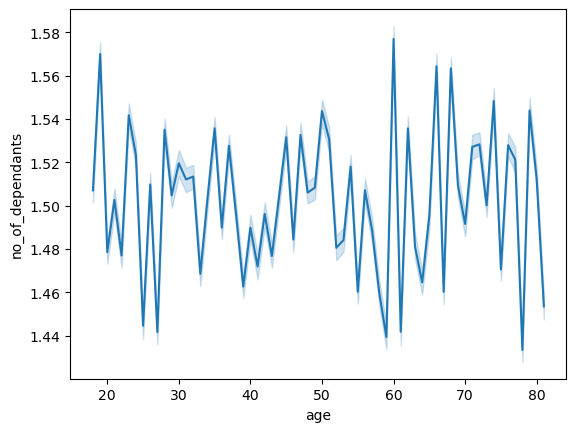

In [40]:
line3 = sns.lineplot(data = df_fam_sit_age, x = 'age', y = 'no_of_dependants')

#### Line chart shows no distinct relationship between number of dependents and age

# Q7 Create a scatterplot to check connection between age and income

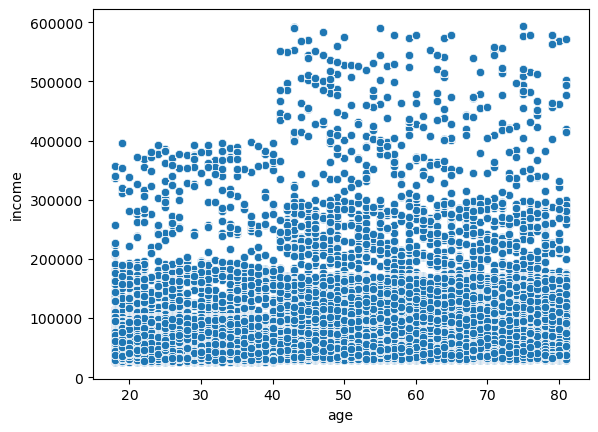

In [41]:
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = df)

#### The scatterplot shows the relationship between age and income of instacart customers. from the scatterplot we can deduce:¶

Customers 40 years and olders are earning more (up to 600,000 USD). Therefore, customers 40 years and above have ability to spend more base on their higher income. Although, there is also a sizeable proportion of instacart users under 40 who earn more (200,000 - 400,000) than the majority of users over the age of 40.

# Q8 Export your visualizations as “.png” files in your relevant project folder

In [42]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_order_dow.png'))

In [44]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_order_hour_of_day.png'))

In [45]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_flag.png'))

In [46]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_order_dow_prices.png'))

In [47]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_age_no_of_dependents.png'))

In [48]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'scatterplot_age_income.png'))